In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
import plotly.express as px
from plotly import graph_objects as go

from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
netflix_data = pd.read_csv('/content/gdrive/MyDrive/netflix_titles.csv')
netflix_data.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


**SHARE OF MOVIES AND TV SHOWS USING PIE PLOT**

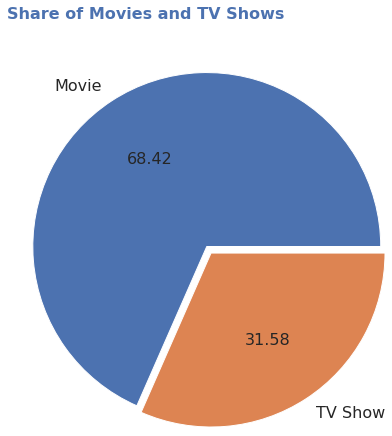

In [5]:
labels = netflix_data['type'].value_counts().index
values = netflix_data['type'].value_counts().values
plt.pie(values,explode=[0,0.09],radius=2,labels=labels,autopct='%.2f',textprops={'fontsize':16})
plt.title('Share of Movies and TV Shows',fontsize=16,fontweight='bold',color='b',position=[0.22,1.22+0.3])
plt.show()

**NETFLIX CONTENT ADDITION MONTHLY FREQUENCY USING HEATMAP**

In [ ]:
 netflix_data['year'] = netflix_data['date_added'].dropna().apply(lambda x:x.split(',')[-1])
 netflix_data.head()

In [ ]:
netflix_data['month'] = netflix_data['date_added'].dropna().apply(lambda x:x.lstrip().split(' ')[0])
netflix_data.head()

In [8]:
month_sequence = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_sequence = month_sequence[::-1]

In [ ]:
month_count = netflix_data.groupby('year')['month'].value_counts().unstack().fillna(0)[month_sequence].T
month_count


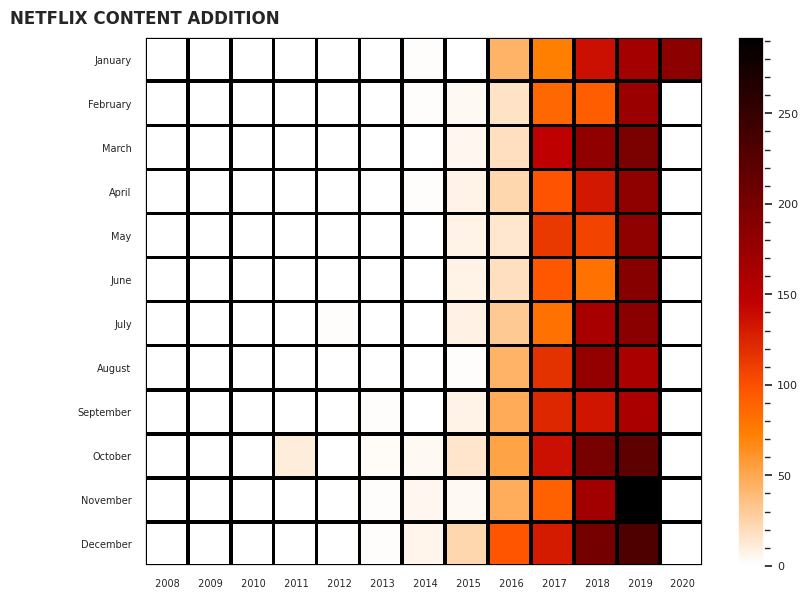

In [10]:
plt.figure(figsize=(9,7),dpi=100)
plt.pcolormesh(month_count,cmap='gist_heat_r',edgecolors='black',linewidths=2)
plt.xticks(np.arange(0.5,len(month_count.columns),1),month_count.columns,fontsize=7)
plt.yticks(np.arange(0.5,len(month_count.index),1),month_count.index,fontsize=7)
plt.title('NETFLIX CONTENT ADDITION',fontsize=12,fontweight='bold',position=[0,1+0.01])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()


**GROWTH OF MOVIES AND TV SHOWS OVER THE YEARS WITH LINE PLOT**

In [ ]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data.head()

In [12]:
year_added =  pd.DataFrame(index= np.unique(netflix_data['date_added'].dt.year))

In [13]:
movie = netflix_data[netflix_data['type']=='Movie']
show = netflix_data[netflix_data['type']=='TV Show']


In [14]:
movies = movie['date_added'].dt.year.value_counts()
shows = show['date_added'].dt.year.value_counts()

In [15]:
year_added['Movie'] = movies
year_added['TV_Show'] = shows

In [17]:
year_added = year_added.fillna(0).astype(int)

<function matplotlib.pyplot.plot>

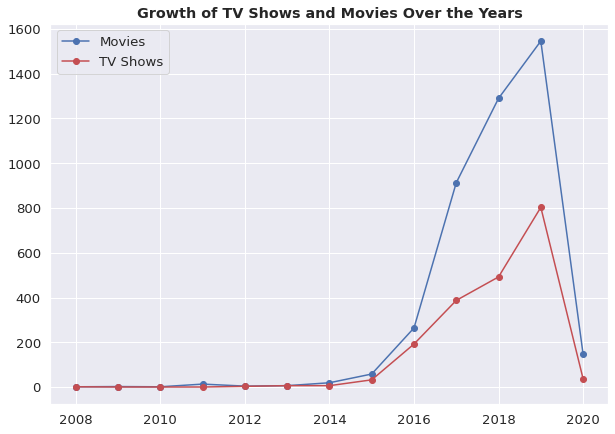

In [18]:
plt.figure(figsize=(10,7))
plt.plot(year_added.index,year_added['Movie'],'bo-',label='Movies')
plt.plot(year_added.index,year_added['TV_Show'],'ro-',label='TV Shows')
plt.title('Growth of TV Shows and Movies Over the Years',fontweight='bold')
plt.legend()
plt.plot

**HIGEST AND LOWEST RATED MOVIES OF ALL TIME USING SUNBURST**

In [19]:
movie_list = pd.read_csv('/content/gdrive/MyDrive/IMDb movies.csv',usecols=['title','genre'])
movie_rating = pd.read_csv('/content/gdrive/MyDrive/IMDb ratings.csv',usecols=['weighted_average_vote'])

In [20]:
movie_rate = pd.DataFrame({'title':movie_list.title,'genre':movie_list.genre,'IMDB Rating':movie_rating.weighted_average_vote})

In [21]:
movie_rate = movie_rate.drop_duplicates(subset=['title','IMDB Rating'])
movie_rate = movie_rate.dropna()

In [22]:
netflix_rating = movie_rate.merge(netflix_data,left_on='title',right_on='title',how='inner')
netflix_rating = netflix_rating.sort_values(by='IMDB Rating',ascending=False)

In [23]:
netflix_rating = netflix_rating.dropna()

In [24]:
top_netflix_rating=netflix_rating[:10]

In [ ]:
top_netflix_rating

In [26]:
fig =px.sunburst(top_netflix_rating,path=['type','release_year','country','title'],values='IMDB Rating',color='IMDB Rating', title='HIGHEST RATED MOVIES OF ALL TIME')
fig.show()

In [27]:
netflix_lowest_rated = netflix_rating[-10:]
fig= px.sunburst(netflix_lowest_rated,path=['type','release_year','country','title'],values='IMDB Rating',color='IMDB Rating',title='LOWEST RATED MOVIES OF ALL TIME')
fig.show()

**CONTENT ACCESS RATING USING BARPLOT**

In [ ]:
movie[['title','release_year']].sort_values(by='release_year').head(15)

In [ ]:
show[['title','release_year']].sort_values(by='release_year').head(15)

In [ ]:
content_rating = netflix_data[['title','rating','type']]
content_rating

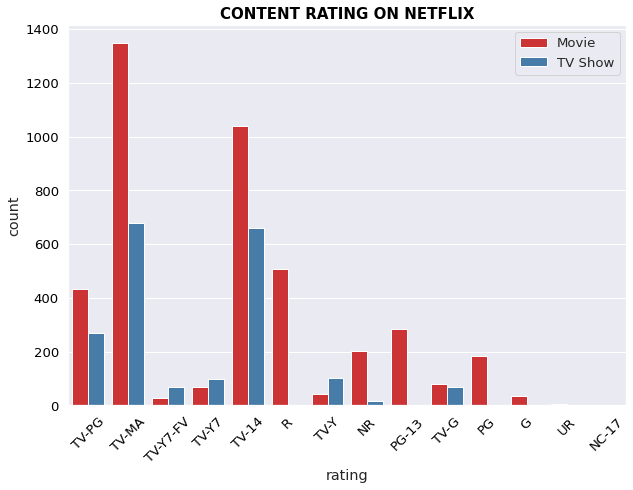

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x='rating',data=content_rating,hue='type',palette='Set1')
plt.xticks(rotation=45,color='black')
plt.yticks(color='black')
plt.title('CONTENT RATING ON NETFLIX',fontweight='bold',fontsize=15,color='black')
plt.legend(loc='upper right')
plt.show()


**DISTRIBUTION FOR DURATION OF MOVIE USING KDE AND BARPLOT**

In [32]:
movie = movie.dropna()

In [33]:
movie_duration = movie['duration'].apply(lambda x:x.split(' ')[0])

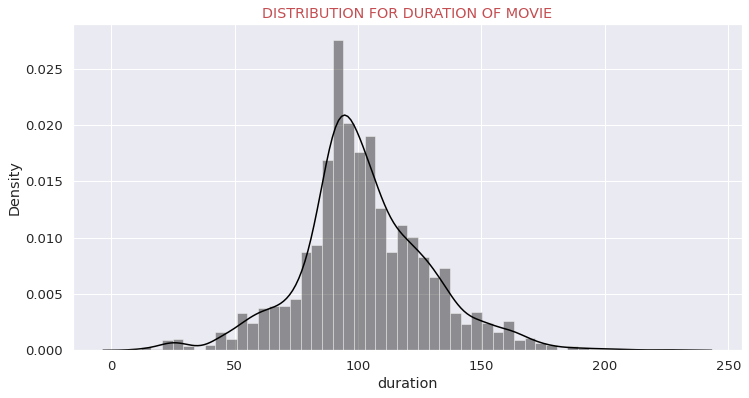

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(movie_duration,color='black')
plt.title('DISTRIBUTION FOR DURATION OF MOVIE',color='r')
plt.show()

**DISTRIBUTION OF NUMBER OF SEASONS OF TV SHOWS USING BAR PLOT**

In [ ]:
show['duration']

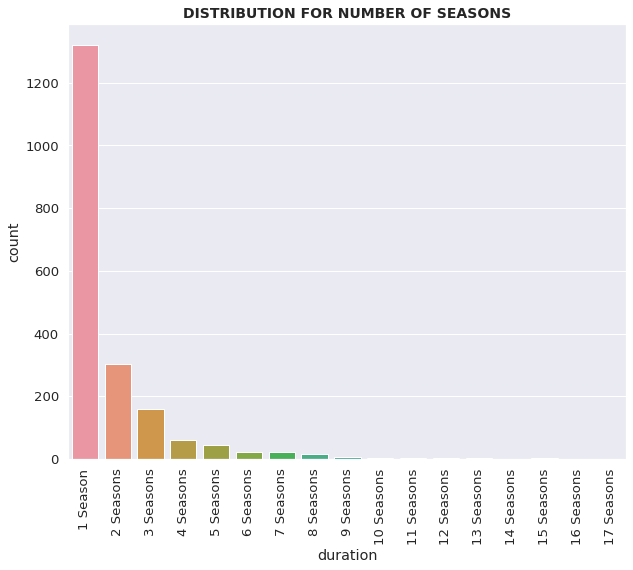

In [36]:
season_order = ['1 Season','2 Seasons','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons','10 Seasons','11 Seasons','12 Seasons','13 Seasons','14 Seasons','15 Seasons','16 Seasons','17 Seasons']
plt.figure(figsize=(10,8))
sns.countplot(x=show['duration'],order = season_order)
plt.title('DISTRIBUTION FOR NUMBER OF SEASONS',fontweight='bold',fontsize=14)
plt.xticks(rotation = 90)
plt.show()

**SHOWS WITH MAXIMUM NUMBER OF SEASONS USING INTERACTIVE BAR GRAPH**

In [ ]:
duration = show['duration'].apply(lambda x:x.split(' ')[0]).astype(int)
duration

In [ ]:
show['number_of_season'] = duration
show.head()

In [ ]:
most_seasons = show[['title','number_of_season']].sort_values(by='number_of_season',ascending=False)[:30]
most_seasons

In [40]:
fig = px.bar(x=most_seasons['title'],y=most_seasons['number_of_season'])
fig.update_layout(
    title="SHOWS WITH MOST SEASONS",
    xaxis_title="TITLE",
    yaxis_title="SEASONS",
    font={
        'size':12,
        'color':"RebeccaPurple"
    }
)
fig.update_layout(autosize=False,width=800,height=600,)
fig.update_layout(xaxis_tickangle=90)
fig.show()

**COUNTRIES WITH MOST CONTENT USING FUNNEL PLOT**

In [41]:
top_countries = netflix_data['country'].value_counts()
top_countries = pd.DataFrame(top_countries)
top10_countries = top_countries[:10].reset_index()

In [42]:
movie_value = pd.DataFrame(movie['country'].value_counts()).reset_index()

In [43]:
top10_countries = top10_countries.merge(movie_value,left_on='index',right_on='index',how='inner')

In [44]:
top10_countries = top10_countries.rename(columns={'country_x':'Overall','country_y':'Movie'})

In [ ]:
top10_countries

In [46]:
show = netflix_data[netflix_data['type']=='TV Show']

In [ ]:
show.isnull().sum()

In [48]:
tv_value = pd.DataFrame(show['country'].value_counts()).reset_index()

In [49]:
tv_value = tv_value[:10]

In [50]:
top10_countries = top10_countries.merge(tv_value,left_on='index',right_on='index',how='inner').rename(columns={'index':'country','country':'TV Shows'})

In [ ]:
top10_countries

In [52]:
df1 = pd.DataFrame(dict(Count=top10_countries['Movie'],Country=top10_countries['country']))

In [ ]:
df1['content type'] = 'Movies'
df1

In [54]:
df2 = pd.DataFrame(dict(Count=top10_countries['TV Shows'],Country=top10_countries['country']))
df2['content type'] = 'TV SHOWS'
df = pd.concat([df1,df2],axis=0)

In [55]:
fig = px.funnel(df,x='Count',y='Country',color='content type',title='COUNTRIES WITH MOST CONTENT')
fig.show()


**COUNT OF TOP GENRES USING VERTICAL LINE PLOTS, INTERACTIVE PIE PLOT AND WORDCLOUD**

In [56]:
genre = list(netflix_data['listed_in'])


In [57]:
genres=[]
for i in genre:
  j=list(i.split(','))
  for k in j:
    genres.append(k.strip())


In [ ]:
genre_count = dict(Counter(genres).most_common(20))
genre_count

In [59]:
 x_1 = list(genre_count.keys())
 y_1 = list(genre_count.values())


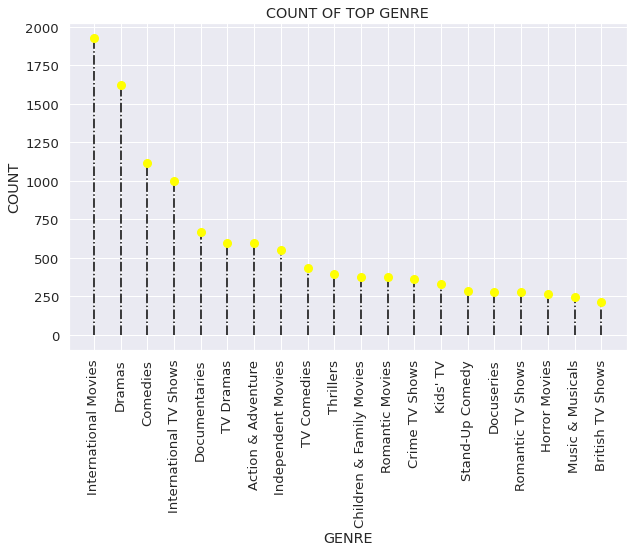

In [138]:
 fig,ax=plt.subplots(figsize=(10,6))
 ax.vlines(x_1,ymin=0,ymax=y_1,color='black',linestyle='dashdot')
 ax.plot(x_1,y_1,'o',color='yellow',markersize=8)
 ax.set_xticklabels(x_1,rotation=90)
ax.set_xlabel('GENRE')
ax.set_ylabel('COUNT')
ax.set_title('COUNT OF TOP GENRE')
plt.show()

In [61]:
fig = px.pie(values=y_1, names=x_1,title='DISTRIBUTION OF GENRE',)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

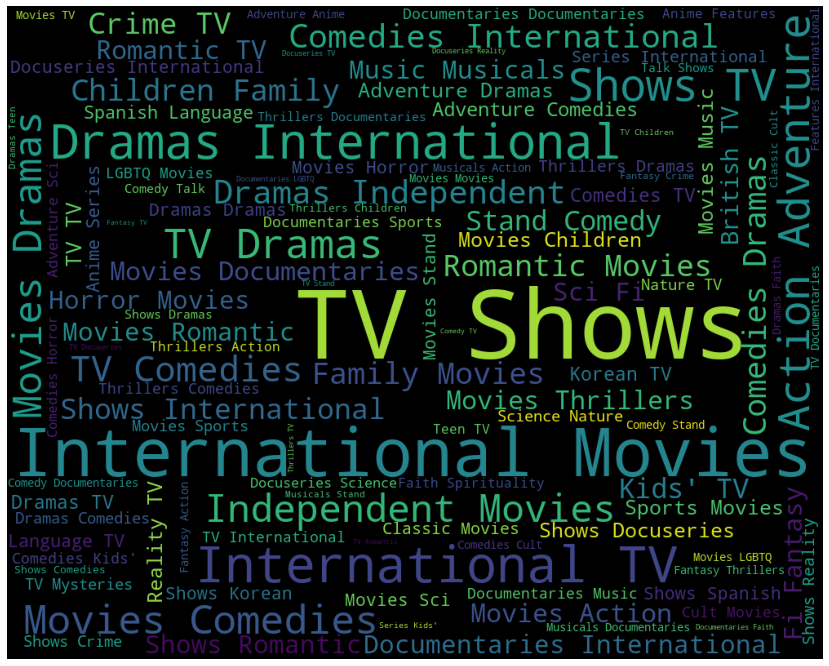

In [62]:
plt.figure(figsize=(15,12))
wc = WordCloud(width=1000,height=800,prefer_horizontal=0.7,min_font_size=8).generate(' '.join(genres))
plt.imshow(wc)
plt.axis('off')
plt.show()

**TREEMAP FOR TOP GENRE IN A SPECIFIC COUNTRY**

In [63]:
def genre_treemap(country):
  country_genre = netflix_data[netflix_data['country']==country]
  country_genre = country_genre.dropna()
  fig = px.treemap(country_genre,path=['country','type','listed_in'],color='listed_in',hover_data=['country','type','listed_in'])
  return fig.show()

In [64]:
genre_treemap('United States')

In [65]:
genre_treemap('India')

**TOP CAST & CREW IN A SPECIFIC COUNTRY USING BAR PLOTS**

In [66]:
def top_cast(country,num):
  country_cast = pd.DataFrame(netflix_data['cast'][netflix_data['country']==country]).dropna()
  top_cast=[]
  cast = list(country_cast['cast'])
  for i in cast:
    j = i.split(',')
    for actor in j:
      top_cast.append(actor.strip())
  top_actors = pd.DataFrame(Counter(top_cast).most_common(num)).rename(columns={0:'Cast',1:'Count'})
  return top_actors
  

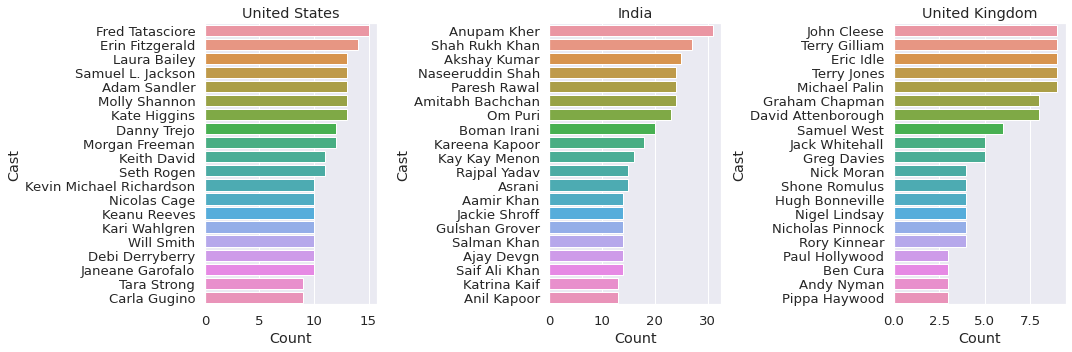

In [67]:
us_top_actor = top_cast('United States',20)
ind_top_actor = top_cast('India',20)
uk_top_cast = top_cast('United Kingdom',20)

fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Count',y='Cast',data=us_top_actor,ax=ax1)
ax1.set_title('United States')
sns.barplot(x='Count',y='Cast',data=ind_top_actor,ax=ax2)
ax2.set_title('India')
sns.barplot(x='Count',y='Cast',data=uk_top_cast,ax=ax3)
ax3.set_title('United Kingdom')
plt.tight_layout()
plt.show()





**TOP DIRECTORS IN A SPECIFIC COUNTRY USING BAR PLOTS**

In [68]:
def top_director(country,nums):
  top_director = pd.DataFrame(netflix_data['director'][netflix_data['country']==country]).dropna()
  top_director_country = []
  director = list(top_director['director'])
  for i in director:
    j = i.split(',')
    for direc in j:
      top_director_country.append(direc.strip())
  top_country_directors = pd.DataFrame(Counter(top_director_country).most_common(nums)).rename(columns={0:'Cast',1:'Count'})
  return top_country_directors

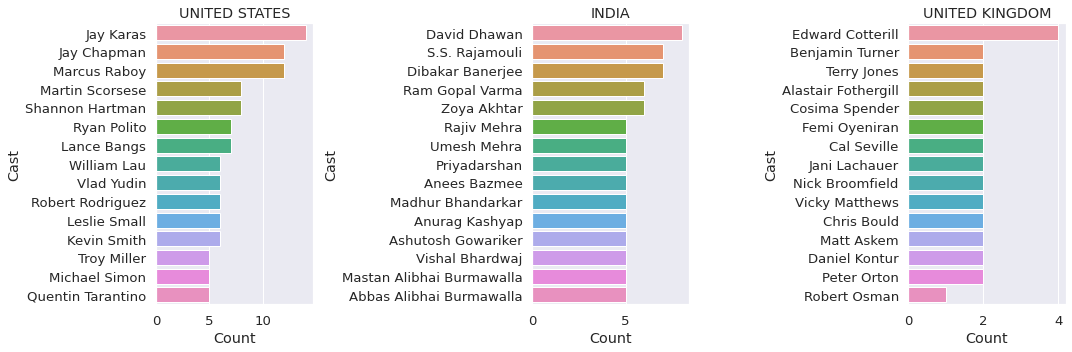

In [69]:
us_director = top_director('United States',15)
ind_director = top_director('India',15)
uk_director = top_director('United Kingdom',15)

fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Count',y='Cast',data=us_director,ax=ax1)
ax1.set_title('UNITED STATES')
sns.barplot(x='Count',y='Cast',data=ind_director,ax=ax2)
ax2.set_title('INDIA')
sns.barplot(x='Count',y='Cast',data=uk_director,ax=ax3)
ax3.set_title('UNITED KINGDOM')
fig.tight_layout()
fig.show()


**RECENTLY ADDED MOVIES AND TV SHOWS ON NETFLIX**

In [70]:
latest_movies = netflix_data[netflix_data['type']=='Movie'].sort_values(by='release_year',ascending=False).dropna().head(10)
latest_movies[['title','country','release_year']]

,title,country,release_year
3518,Ghost Stories,India,2020
3180,Bulletproof 2,United States,2020
3427,Leslie Jones: Time Machine,United States,2020
3195,"Live Twice, Love Once",Spain,2020
3249,All the Freckles in the World,Mexico,2020
1077,Atlantics,"France, Senegal, Belgium",2019
1079,I Lost My Body,France,2019
4457,Ronny Chieng: Asian Comedian Destroys America!,United States,2019
1088,Holiday Rush,United States,2019
1097,Evvarikee Cheppoddu,India,2019


In [71]:
latest_shows = netflix_data[netflix_data['type']=='TV Show'].sort_values(by='release_year',ascending=False)
latest_shows[['title','country','release_year']].dropna().head(10)

,title,country,release_year
3541,Messiah,United States,2020
3426,Kipo and the Age of Wonderbeasts,United States,2020
1315,Maradona in Mexico,"Argentina, United States, Mexico",2020
3325,"Sex, Explained",United States,2020
3363,Handsome Siblings,China,2020
3379,Killer Inside: The Mind of Aaron Hernandez,United States,2020
3220,Dracula,United Kingdom,2020
3464,AJ and the Queen,United States,2020
3466,Jamtara - Sabka Number Ayega,India,2020
3467,Medical Police,United States,2020


**CONTENT BASED SHOW RECOMMENDOR**

In [ ]:
netflix_data = netflix_data.fillna('')
features = ['type','title','director','cast','listed_in','description']
recommendor_data = netflix_data[features]
recommendor_data.head(2)

In [74]:
def to_lower(data):
  return str.lower(data)
for feat in recommendor_data.columns:
  recommendor_data[feat] = recommendor_data[feat].apply(to_lower)

In [75]:
def single_string(word):
  answ=''
  for i in word.columns:
    answ = answ + word[i] +' '
  return answ
recommendor_data['single_string'] = single_string(recommendor_data)

In [ ]:
count = CountVectorizer(stop_words='english')
word_to_number_matrix = count.fit_transform(recommendor_data['single_string'])
word_to_number_matrix

**COSINE SIMILARITY MODEL**

In [77]:
cosine_simu = cosine_similarity(word_to_number_matrix,word_to_number_matrix)


In [ ]:
recommendor_data = recommendor_data.reset_index()
recommendor_data.head(5)

In [ ]:
indices = pd.Series(recommendor_data.index,index = recommendor_data['title'])
indices

In [136]:
def recommend_show(title,cosine_simu=cosine_simu):
  title = title.lower()
  if title not in netflix_data['title'].str.lower().to_list():
    print('Sorry! {} dosen\'t exist in the NETFLIX Database'.format(title.upper()))
  else:
    code = indices[title]
    similarity_order = sorted(list(enumerate(cosine_simu[code])),key=lambda x:x[1],reverse=True)
    top10_score = similarity_order[1:11]
    top10_scontent = [i[0]for i in top10_score]
    similar_movies = netflix_data[['title','release_year']].iloc[top10_scontent]
    return print('Movies that you would like to see on th basis of your previous - {}\n {}'.format(title.upper(),similar_movies.to_string(index=False)))

In [140]:
recommend_show('The Conjuring')

Movies that you would like to see on th basis of your previous - THE CONJURING
                                          title  release_year
                                     Insidious          2010
                          To and From New York          2006
                                         Creep          2014
                                     The Witch          2015
                                      Adrishya          2017
                             In the Tall Grass          2019
                                The Perfection          2019
                                   Lifechanger          2018
                                  Family Blood          2018
 I Am the Pretty Thing That Lives in the House          2016


In [141]:
recommend_show('Lagaan')

Movies that you would like to see on th basis of your previous - LAGAAN
                                title  release_year
                      Dil Chahta Hai          2001
                              Swades          2004
 Once Upon a Time in Mumbai Dobaara!          2013
                                  PK          2014
                     Mumbai Cha Raja          2012
                        Jodhaa Akbar          2008
                            3 Idiots          2009
               Ek Khiladi Ek Haseena          2005
               Madness in the Desert          2004
                        Maya Memsaab          1993


In [148]:
recommend_show('Bard of Blood')

Movies that you would like to see on th basis of your previous - BARD OF BLOOD
              title  release_year
  Back with the Ex          2018
             Argon          2017
    My Hotter Half          2017
        I Hear You          2019
 Twice Upon A Time          2019
           Re:Mind          2017
       Van Helsing          2018
        Blood Pact          2018
     Stunt Science          2018
   I Have a Script          2019


In [151]:
recommend_show('Inception')

Movies that you would like to see on th basis of your previous - INCEPTION
                                title  release_year
                           Apollo 18          2011
        Dragonheart: A New Beginning          2000
                                   9          2009
                    The Darkest Dawn          2016
 The Imaginarium of Doctor Parnassus          2009
                            Hulk Vs.          2009
                           The Titan          2018
                          Extinction          2018
                        Solomon Kane          2009
                     The Book of Eli          2010
